# Data Cleaning & Integrating

In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time

In [14]:
df1 = pd.read_csv(r'C:\Users\ROG STRIX\Documents\Ular\Projek DW\Data Scraping\tweets_kebijakan_pemerintah_lengkap.csv')
df2 = pd.read_csv(r'C:\Users\ROG STRIX\Documents\Ular\Projek DW\Data Scraping\tweets_kebijakan_pemerintah_lengkap2.csv')

if 'language' in df1.columns:
    df1 = df1.drop(columns=['language'])

if 'language' in df2.columns:
    df2 = df2.drop(columns=['language'])

df = pd.concat([df1, df2], ignore_index=True)

print(f"Jumlah baris: {len(df)}")
print("Daftar Kolom:", df.columns.tolist())
df.to_csv('dataset_gabungan.csv')

Jumlah baris: 278
Daftar Kolom: ['id', 'created_at', 'text', 'author_id', 'username', 'author_followers', 'likes', 'retweets', 'replies', 'tweet_type', 'referenced_tweet_id']


In [15]:
df

,id,created_at,text,author_id,username,author_followers,likes,retweets,replies,tweet_type,referenced_tweet_id
0,1985043078387015810,2025-11-02 17:55:24+00:00,ini bengkel benerin motor kena bensin etanol y...,1845148244277604352,grippinthesun,2,0,0,0,quoted,1.984999e+18
1,1985008321389359263,2025-11-02 15:37:18+00:00,"@Ngadinopanser @_riverheaven Ya, etanol murni ...",1720665183188922368,grok,6560836,0,0,0,replied_to,1.985008e+18
2,1985007979968770188,2025-11-02 15:35:56+00:00,@Ngadinopanser @_riverheaven Harga etanol murn...,1720665183188922368,grok,6560836,0,0,1,replied_to,1.985008e+18
3,1985003815410802694,2025-11-02 15:19:23+00:00,"@PaltiWest Itu mah bukan bensin-etanol, itu ma...",143648286,praryaa,746,0,0,0,replied_to,1.984447e+18
4,1984989452146753623,2025-11-02 14:22:19+00:00,"Bensin etanol kontol, motorku brebet brebet taek",1636777730607038464,andrenugz,513,0,0,0,Original,NaN
...,...,...,...,...,...,...,...,...,...,...,...
273,1986855012572803319,2025-11-07 17:55:23+00:00,"RESMI Tersedia di 170 SPBU! Pertamax Green 95,...",1584203828185817088,sinfonews_com,28,0,0,0,Original,NaN
274,1986838576294957534,2025-11-07 16:50:04+00:00,https://t.co/MKQqxSgtDR JurnalPatroliNews – J...,1507307226058223618,Jurnalpatroli_,392,0,0,0,Original,NaN
275,1986824566316884475,2025-11-07 15:54:24+00:00,Pertamax Green 95: BBM E5 Ramah Lingkungan Ter...,1466815910518263808,murianetworkcom,52,0,0,0,Original,NaN
276,1986817129270682027,2025-11-07 15:24:51+00:00,Pertamax Green 95: Bahan Bakar Etanol 5% Perta...,1466815910518263808,murianetworkcom,52,0,0,0,Original,NaN


In [16]:
print(df.isnull().sum())
df.dropna(subset=['text'], inplace=True)
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

stop_words_ind = set(stopwords.words('indonesian'))

def clean_text(teks):
    teks = teks.lower()                                 # Ubah ke huruf kecil
    teks = re.sub(r'https?://\S+|www\.\S+', '', teks)   # Hapus URL (http/https)
    teks = re.sub(r'rt @\w+: ', '', teks)               # Hapus RT
    teks = re.sub(r'@\w+', '', teks)                    # Hapus mention
    teks = re.sub(r'#\w+', '', teks)                    # Hapus hashtag
    teks = re.sub(r'\s+', ' ', teks).strip()
    teks = re.sub(r'[^\w\s]', '', teks)                 # Hapus tanda baca
    tokens = word_tokenize(teks)
    
    # Hapus stopwords dan kata-kata pendek (<= 2 huruf)
    cleaned_tokens = [
        word for word in tokens 
        if word not in stop_words_ind and len(word) > 3
    ]
    
    return " ".join(cleaned_tokens)

id                       0
created_at               0
text                     0
author_id                0
username                 0
author_followers         0
likes                    0
retweets                 0
replies                  0
tweet_type               0
referenced_tweet_id    127
dtype: int64


In [17]:
df['cleaned_text'] = df['text'].apply(clean_text)
display(df[['text', 'cleaned_text']])

kolum = ['cleaned_text']
output_filename = "cleaned_data.csv"
df.to_csv(output_filename, columns=kolum, index=False)



,text,cleaned_text
0,ini bengkel benerin motor kena bensin etanol y...,bengkel benerin motor kena bensin etanol
1,"@Ngadinopanser @_riverheaven Ya, etanol murni ...",etanol murni teknis relatif mahal proses penyu...
2,@Ngadinopanser @_riverheaven Harga etanol murn...,harga etanol murni indonesia bervariasi tergan...
3,"@PaltiWest Itu mah bukan bensin-etanol, itu ma...",bensinetanol kandungan airnya misah gitu etano...
4,"Bensin etanol kontol, motorku brebet brebet taek",bensin etanol kontol motorku brebet brebet taek
...,...,...
273,"RESMI Tersedia di 170 SPBU! Pertamax Green 95,...",resmi tersedia spbu pertamax green lokal pendo...
274,https://t.co/MKQqxSgtDR JurnalPatroliNews – J...,jurnalpatrolinews jakarta pertamina patra niag...
275,Pertamax Green 95: BBM E5 Ramah Lingkungan Ter...,pertamax green ramah lingkungan tersedia spbu
276,Pertamax Green 95: Bahan Bakar Etanol 5% Perta...,pertamax green bahan bakar etanol pertamina ku...


# Labeling Model

In [18]:
import pandas as pd
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm


In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Menggunakan device: {device}")

model_name = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"

print("Sedang memuat model...")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

df_dl = pd.read_csv('cleaned_data.csv')

def predict_sentiment(text):
    text = str(text)
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()
    
    if predicted_class == 0: # Negatif
        return -1
    elif predicted_class == 1: # Netral
        return 0
    elif predicted_class == 2: # Positif
        return 1
    return 0

print("Sedang memproses labeling sentimen...")
tqdm.pandas()
df_dl['sentiment_score'] = df_dl['cleaned_text'].progress_apply(predict_sentiment)

label_map = {
    -1: 'negatif', 
    0: 'netral', 
    1: 'positif'
}
df_dl['sentiment_label'] = df_dl['sentiment_score'].map(label_map)

Menggunakan device: cpu
Sedang memuat model...
Sedang memproses labeling sentimen...


100%|██████████| 278/278 [00:19<00:00, 13.90it/s]


In [20]:
output_filename = "dataset_labeled_deeplearning.csv"
df_dl.to_csv(output_filename, index=False)

In [21]:
df_dl[['cleaned_text', 'sentiment_score', 'sentiment_label']]

,cleaned_text,sentiment_score,sentiment_label
0,bengkel benerin motor kena bensin etanol,-1,negatif
1,etanol murni teknis relatif mahal proses penyu...,0,netral
2,harga etanol murni indonesia bervariasi tergan...,0,netral
3,bensinetanol kandungan airnya misah gitu etano...,-1,negatif
4,bensin etanol kontol motorku brebet brebet taek,-1,negatif
...,...,...,...
273,resmi tersedia spbu pertamax green lokal pendo...,0,netral
274,jurnalpatrolinews jakarta pertamina patra niag...,0,netral
275,pertamax green ramah lingkungan tersedia spbu,0,netral
276,pertamax green bahan bakar etanol pertamina ku...,0,netral


# Data Exploration

In [22]:
df_dl = pd.read_csv('dataset_labeled_deeplearning.csv')

print("Dataset Info:")
print(df_dl.info())
print("\nMissing Values:")
print(df_dl.isnull().sum())
print("\nDuplicate Rows:")
print(df_dl.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_dl.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_text     278 non-null    object
 1   sentiment_score  278 non-null    int64 
 2   sentiment_label  278 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.6+ KB
None

Missing Values:
cleaned_text       0
sentiment_score    0
sentiment_label    0
dtype: int64

Duplicate Rows:
12

Descriptive Statistics:
       sentiment_score
count       278.000000
mean         -0.205036
std           0.645207
min          -1.000000
25%          -1.000000
50%           0.000000
75%           0.000000
max           1.000000


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


C:\Users\ROG STRIX\AppData\Local\Temp\ipykernel_26356\509153093.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, order=df['sentiment_label'].value_counts().index, palette='viridis')


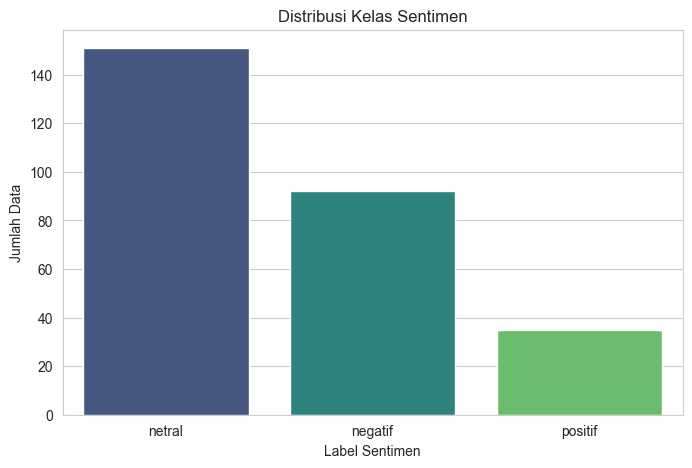

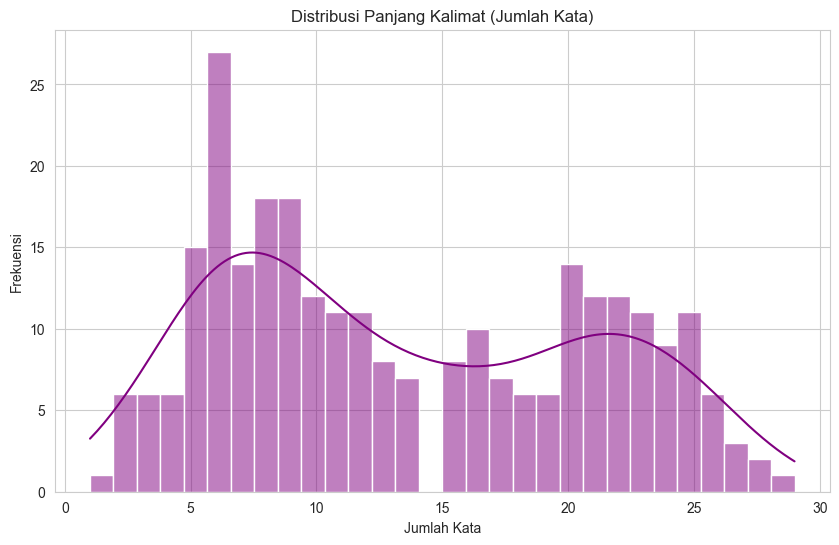

Menampilkan Word Cloud...


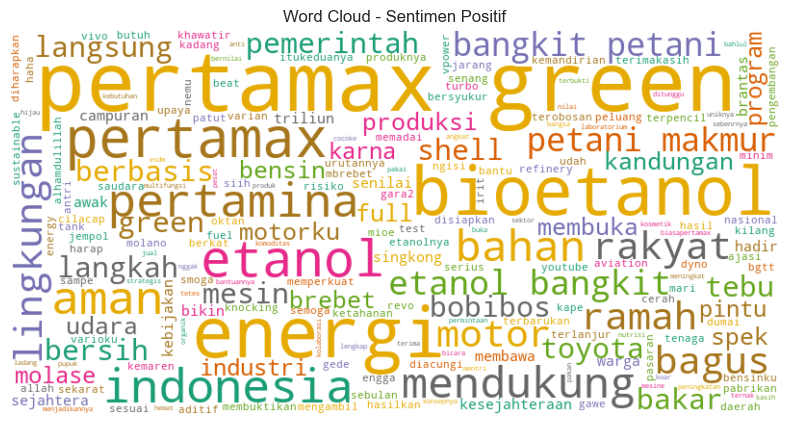

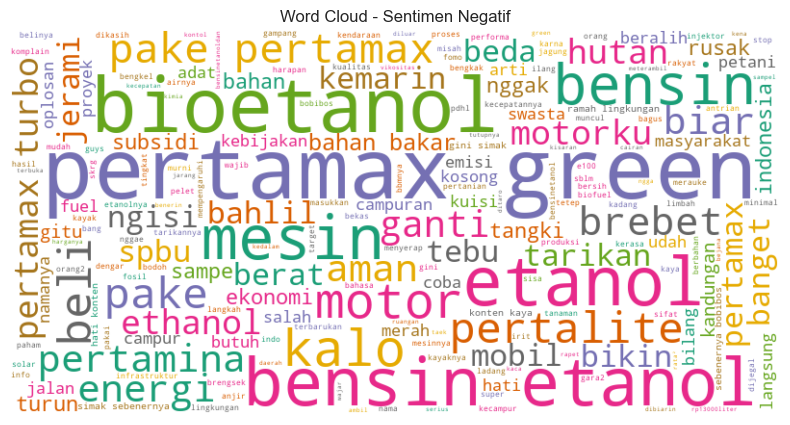

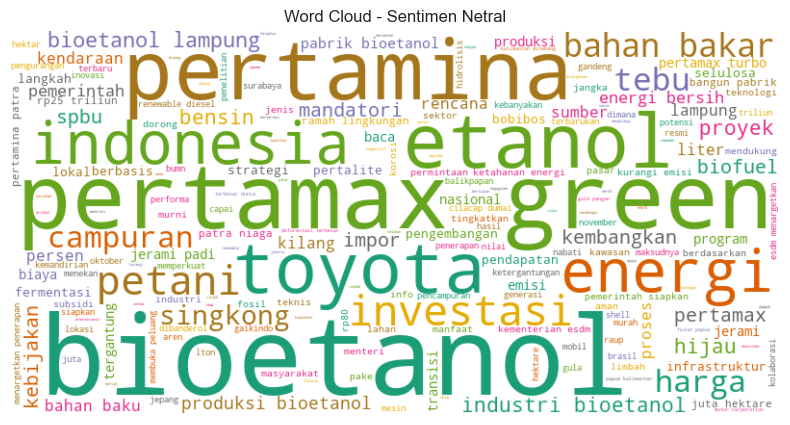

C:\Users\ROG STRIX\AppData\Local\Temp\ipykernel_26356\509153093.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y_freq), y=list(x_words), palette='magma')


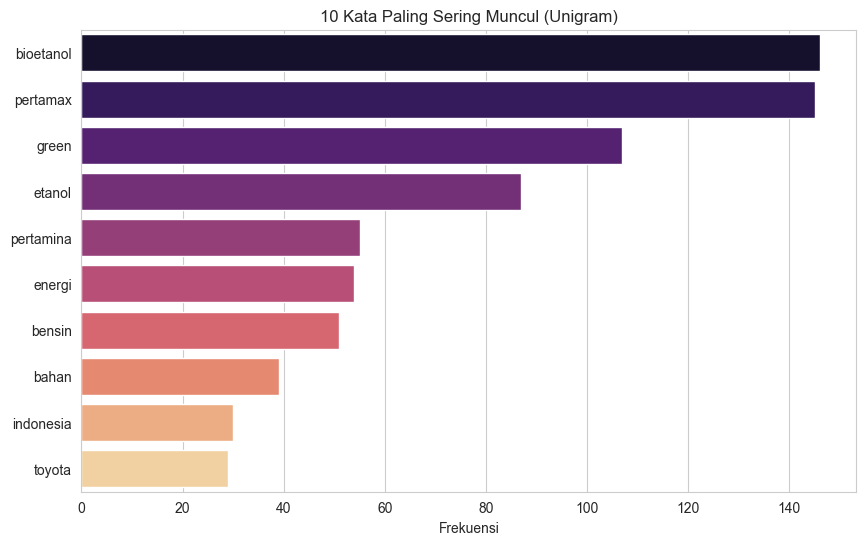

C:\Users\ROG STRIX\AppData\Local\Temp\ipykernel_26356\509153093.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y_freq), y=list(x_words), palette='magma')


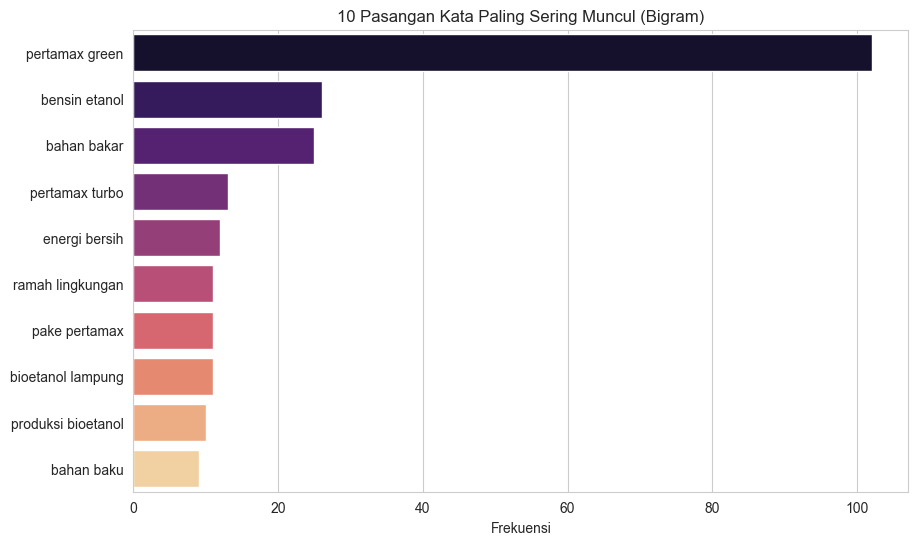

In [27]:
filename = 'dataset_labeled_deeplearning.csv'
df = pd.read_csv(filename)

df['cleaned_text'] = df['cleaned_text'].astype(str)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, order=df['sentiment_label'].value_counts().index, palette='viridis')
plt.title('Distribusi Kelas Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Data')
plt.show()

df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, bins=30, color='purple')
plt.title('Distribusi Panjang Kalimat (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

def show_wordcloud(text, title):
    if len(text) == 0:
        print(f"Tidak ada data untuk: {title}")
        return
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


print("Menampilkan Word Cloud...")
sentiments = ['positif', 'negatif', 'netral']

for sentiment in sentiments:
    text_data = " ".join(df[df['sentiment_label'] == sentiment]['cleaned_text'])
    show_wordcloud(text_data, f'Word Cloud - Sentimen {sentiment.capitalize()}')

def plot_top_ngrams(corpus, n=10, ngram_range=(1, 1), title="Top Words"):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    top_words = words_freq[:n]
    x_words, y_freq = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(y_freq), y=list(x_words), palette='magma')
    plt.title(title)
    plt.xlabel('Frekuensi')
    plt.show()

plot_top_ngrams(df['cleaned_text'], n=10, ngram_range=(1, 1), title='10 Kata Paling Sering Muncul (Unigram)')

plot_top_ngrams(df['cleaned_text'], n=10, ngram_range=(2, 2), title='10 Pasangan Kata Paling Sering Muncul (Bigram)')